## Drawing Lines
Replicate the code in this guide and this guide. This will pull the iris data set, fit a linear regression and a logistic regression, and visualize the output. 

Pro-tip: This is super easy to do with a code generating transformer. You'll need to use some variation of the following prompt:

Iris/Regression: "I'm a data scientist. I want to build a s building a simple pipeline to do regression on the iris dataset. Here's some example code <paste in code from the guide>. Can you write me a few short python functions based on this to load the data set, fit a linear regression and a logistic regression, and then visualize the fits of both models side-by-side?"

The transformer will probably ask for a few clarifications. For example, it might ask what data values are you regressing. 


MNIST/Classification: "I'm a data scientist. I want to build a s building a simple pipeline to do classification on the MNIST dataset. Here's some example code <paste in code from the guide>. Can you write me a few short python functions based on this to load the data set, fit a naive Bayes classifier, and give me appropriate classification metrics (accuracy, f1, confusability matrix, etc).

The transformer will probably ask for a few clarifications. For example, it might ask what classes you're trying to distinguish between. 

<Figure size 600x400 with 0 Axes>

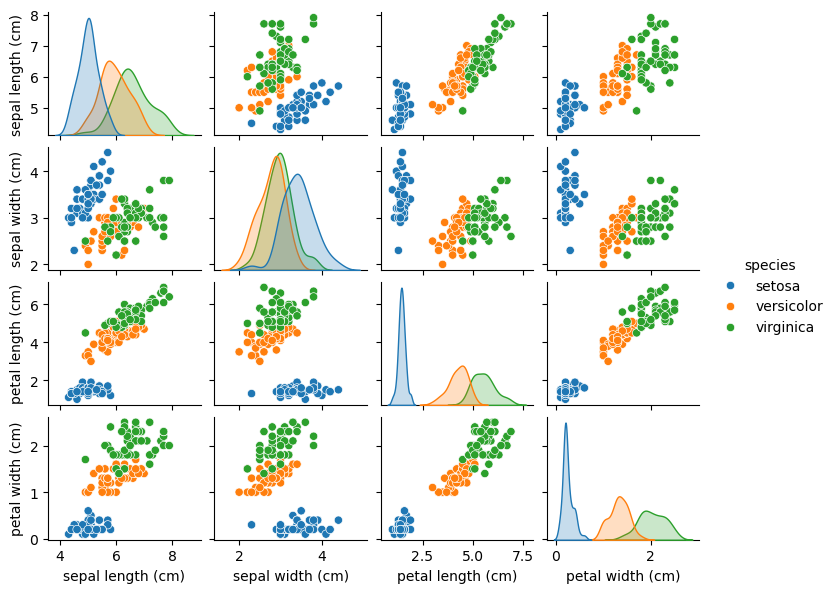

Mean Absolute Error (Linear Regression): 0.26
Mean Squared Error (Linear Regression): 0.11
Root Mean Squared Error (Linear Regression): 0.33
R² (Linear Regression): 0.84


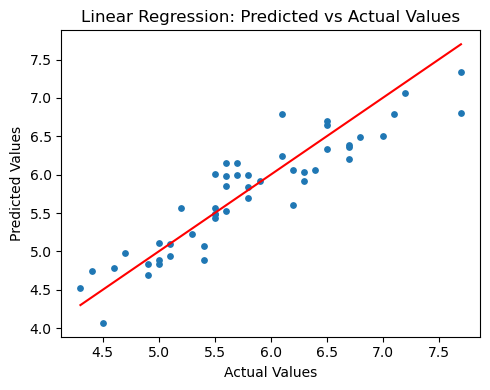

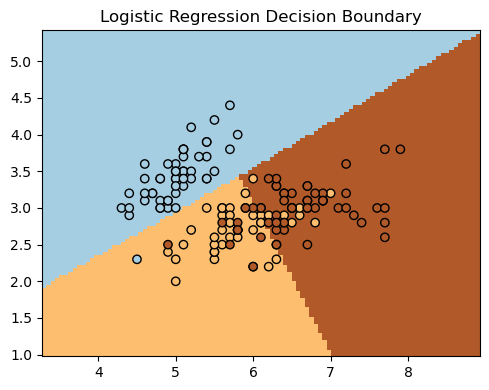

In [131]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay

# Load Iris Data
iris = load_iris()

# Creating DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

# Converting species to categorical labels
def converter(specie):
    if specie == 0:
        return 'setosa'
    elif specie == 1:
        return 'versicolor'
    else:
        return 'virginica'
target_df['species'] = target_df['species'].apply(converter)

# Concatenate and visualize dataset
iris_df = pd.concat([iris_df, target_df], axis=1)
plt.figure(figsize=(6, 4))  # Adjusting size
sns.pairplot(iris_df, hue='species', height=1.5, aspect=1.2)
plt.show()

# Linear Regression: Drop 'species' column and prepare X and y for regression
iris_df.drop('species', axis=1, inplace=True)
X_reg = iris_df.drop(labels='sepal length (cm)', axis=1)
y_reg = iris_df['sepal length (cm)']

# Splitting the Dataset for Linear Regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.33, random_state=101)

# Linear Regression model
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)

# Making predictions
pred_reg = lr.predict(X_test_reg)

# Evaluating Linear Regression model
mae = mean_absolute_error(y_test_reg, pred_reg)
mse = mean_squared_error(y_test_reg, pred_reg)
rmse = np.sqrt(mse)
r2 = lr.score(X_test_reg, y_test_reg)

print(f'Mean Absolute Error (Linear Regression): {mae:.2f}')
print(f'Mean Squared Error (Linear Regression): {mse:.2f}')
print(f'Root Mean Squared Error (Linear Regression): {rmse:.2f}')
print(f'R² (Linear Regression): {r2:.2f}')

# Visualize Predictions vs Actual Values
plt.figure(figsize=(5, 4))  # Adjusting size
plt.scatter(y_test_reg, pred_reg, s=15)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red')  # Diagonal line
plt.title('Linear Regression: Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()

# Logistic Regression: Use the first two features (sepal length and width)
X_log = iris.data[:, :2]  # Only use the first two features
y_log = iris.target

# Splitting the Dataset for Logistic Regression
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.33, random_state=101)

# Logistic Regression model
log_reg = LogisticRegression(C=1e5, max_iter=200)
log_reg.fit(X_train_log, y_train_log)

# Visualizing Logistic Regression Decision Boundary
_, ax = plt.subplots(figsize=(5, 4))  # Adjusting size
DecisionBoundaryDisplay.from_estimator(
    log_reg, X_log, cmap=plt.cm.Paired, ax=ax, response_method="predict", plot_method="pcolormesh", shading="auto"
)
ax.scatter(X_log[:, 0], X_log[:, 1], c=y_log, edgecolors="k", cmap=plt.cm.Paired)
ax.set_title("Logistic Regression Decision Boundary")
plt.tight_layout()
plt.show()


Accuracy: 0.55
F1 Score: 0.49

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.92      0.75      2058
           1       0.79      0.95      0.86      2364
           2       0.86      0.31      0.45      2133
           3       0.75      0.34      0.47      2176
           4       0.86      0.13      0.23      1936
           5       0.55      0.04      0.07      1915
           6       0.61      0.95      0.74      2088
           7       0.90      0.29      0.44      2248
           8       0.30      0.56      0.39      1992
           9       0.37      0.94      0.53      2090

    accuracy                           0.55     21000
   macro avg       0.66      0.54      0.49     21000
weighted avg       0.67      0.55      0.50     21000



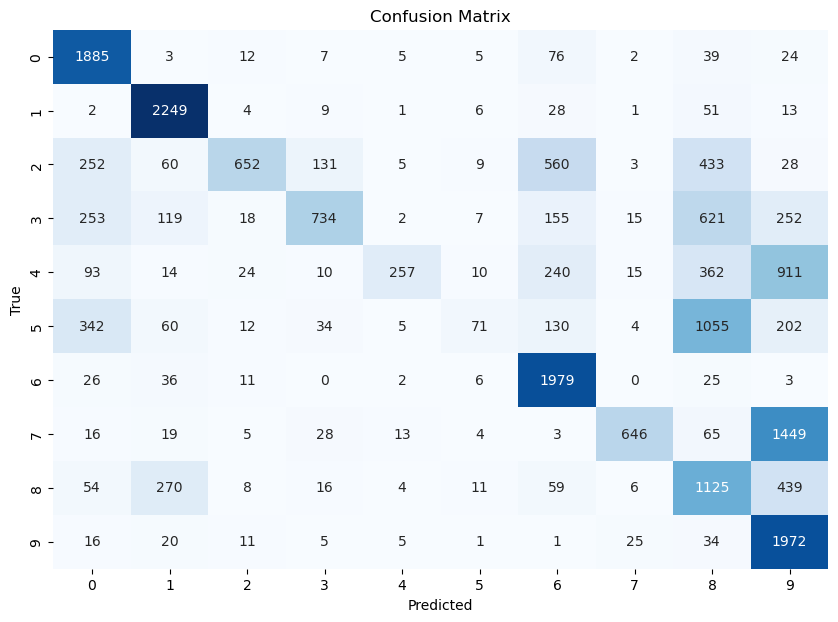

In [127]:
#MNIST/Classification

from sklearn.datasets import fetch_openml
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load the MNIST dataset
def load_mnist_data():
    mnist = fetch_openml('mnist_784', version=1)
    X, y = mnist.data, mnist.target
    return X, y

# Function to fit a Naive Bayes classifier
def fit_naive_bayes(X_train, y_train):
    model = GaussianNB()
    model.fit(X_train, y_train)
    return model

# Function to evaluate the classifier
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    # Calculate accuracy, F1 score, and confusion matrix
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Run the pipeline
X, y = load_mnist_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = fit_naive_bayes(X_train, y_train)
evaluate_model(model, X_test, y_test)


### Interpretation of MNIST Confusion Metrics:
<br> Accuracy (0.55): The model correctly classified 55% of the digits, which is relatively low for the MNIST dataset.

F1 Score (0.49): The average balance between precision and recall is 0.49, indicating the model struggles with some classes.

Per-Class Insights:
Classes 0 and 1: Strong performance with high precision and recall, meaning the model reliably identifies these digits.
Classes 2, 3, 4, 5, 7: Poor performance, as indicated by low recall and F1 scores. The model fails to correctly identify many instances of these digits.
Class 9: The model has good recall (0.94) but low precision, meaning many misclassifications as "9."
Overall, the model struggles with multiple digit classes, suggesting poor generalization across the dataset.








Question 1 of 3
## Basic Questions for class (2)


Include your chat with GPT here. You might want to ask it some clarifying questions to make sure you understand what's going on: 



1. What is the Iris data? What real world property is represented by the labels and numbers in the data set?
2. What patterns do you see visually in the data? What do you think these patterns mean? 
3. What patterns do the models seem to be trying to fit? 
4. What's a loss function in the context of a machine learning model?
5. What's a metric in the context of a machine learning model?
6. Define "residuals," "accuracy," and "sensitivity."  


### Answer to Q1
The Iris dataset is one of the most famous datasets used in machine learning and statistical classification tasks. It was introduced by the British biologist Ronald Fisher in 1936 as an example of discriminant analysis. This dataset is often used for educational purposes and to demonstrate classification algorithms.

Overview of the Iris Dataset:
Features (Attributes): The dataset contains 150 samples, each describing a flower's physical characteristics (or features). Each sample has the following four features (all are continuous numerical values):

Sepal length (cm) – The length of the outer part of the flower.
Sepal width (cm) – The width of the outer part of the flower.
Petal length (cm) – The length of the inner part of the flower.
Petal width (cm) – The width of the inner part of the flower.
Target (Label): Each sample is classified into one of three species of the Iris flower:

Iris setosa (label 0)
Iris versicolor (label 1)
Iris virginica (label 2)
The target (or label) represents the species of the iris flower, which is the real-world property we are trying to predict based on the features.

Real-World Property Representation:
Sepal and Petal Measurements: The numerical values (in centimeters) represent real-world physical properties of iris flowers. These measurements help in identifying and differentiating between the three iris species.

Target Labels (0, 1, 2): The target labels are categorical and represent the species classification of the flowers. Each label corresponds to a species of iris, and the goal is to classify a flower into one of these species based on the sepal and petal measurements.

In real-world applications, this dataset can be considered an example of a classification problem, where we aim to assign a new flower to one of the three species based on its physical attributes. It demonstrates how machine learning algorithms can be used to classify objects based on numerical features derived from the real world.

### Answer to Q2
When visualizing the Iris dataset, several distinct patterns emerge, particularly when plotting the four features (sepal length, sepal width, petal length, and petal width) against one another. Below are some common observations and what they could imply:

1. Separation of Species in Feature Space
Setosa is linearly separable: When visualizing the dataset (e.g., using scatter plots of petal length vs. petal width), Iris setosa is often clearly separated from the other two species (Iris versicolor and Iris virginica). This means that the physical characteristics of Iris setosa flowers (smaller petal and sepal dimensions) are quite distinct, making it easier to classify.

Versicolor and Virginica overlap: Iris versicolor and Iris virginica are not as clearly separable as Iris setosa. Their feature values overlap, particularly in petal dimensions, which suggests that these two species are more similar to each other. This implies that distinguishing between these two species is more challenging, and classification algorithms may need to use more sophisticated methods to separate them.

Meaning:
Setosa's distinct characteristics: This species is visually distinct due to its smaller petals and sepals, meaning it might be easy to classify with simple algorithms like linear classifiers.
Versicolor and Virginica's overlap: These two species are more difficult to distinguish based on the features, indicating a need for more complex classification models or feature engineering to separate them effectively.
2. Feature Relationships
Petal length and petal width have strong correlations: There is a clear linear relationship between petal length and petal width across all species. As the petal length increases, so does the petal width, particularly for Iris versicolor and Iris virginica. This strong correlation suggests that these two features provide a lot of information about the classification.

Sepal measurements are less correlated with species: Sepal length and width do not show as strong a correlation with the target species, particularly in the case of Iris versicolor and Iris virginica. These measurements are more variable and provide less clear separation between the species compared to the petal dimensions.

Meaning:
Petal features are more informative: Petal dimensions provide more information for distinguishing between species, especially for versicolor and virginica. Algorithms will likely rely heavily on these features for accurate classification.
Sepal features are less effective: Sepal measurements are less effective in distinguishing between species and may contribute less to classification accuracy.
3. Cluster Formation
Species tend to form clusters: When visualizing pairwise plots of the features, distinct clusters form for each species, especially for petal length and petal width. For example, Iris setosa forms a tight cluster with smaller feature values, while Iris virginica tends to cluster around larger values of petal dimensions.
Meaning:
Clear species boundaries: The clustering of data points suggests that the species do have distinct ranges of physical properties. This supports the idea that machine learning algorithms can successfully classify these species based on feature patterns.
4. Patterns in Pairwise Plots (e.g., Seaborn’s Pairplot)
When you create pairwise scatter plots for all features (e.g., using Seaborn's pairplot), you can visually observe how the different species are distributed across various feature combinations:
Iris setosa is usually visually separated in almost every plot.
Iris versicolor and Iris virginica tend to overlap in most feature combinations except for petal length vs. petal width, where they are more distinguishable.
Summary of Visual Patterns:
Iris setosa is easily separable due to distinct feature values, especially in petal size.
Iris versicolor and Iris virginica overlap more, particularly in sepal features, making them harder to classify.
Petal dimensions (length and width) show stronger patterns for classification, indicating that these features are more useful for separating species.
The dataset forms clear clusters, making it amenable to classification techniques, especially when focusing on petal features.
Conclusion:
The visual patterns suggest that machine learning models, especially classifiers, will perform well on this dataset, particularly when using petal features for classification. Simpler models can handle the classification of Iris setosa, but more complex techniques might be necessary to distinguish between Iris versicolor and Iris virginica.

### Answer to Q3
The models in the Iris dataset are trying to fit patterns based on the relationships between the features (sepal length, sepal width, petal length, and petal width) to classify the flower species.

Logistic Regression:
It tries to find decision boundaries that separate the species based on the feature values. It fits a linear decision surface (hyperplane) between classes, aiming to assign the correct class label (setosa, versicolor, or virginica) to new samples by maximizing the likelihood of correct classification.
Linear Regression (if applicable):
If applied, linear regression would try to model the relationship between continuous variables (like predicting one feature from others), although it's not ideal for categorical targets like species. It would attempt to predict species as a continuous variable, which isn't meaningful here.
In both cases, the models focus on fitting the correlations and separability of features, especially using petal length and width, which show the strongest patterns for classification.








### Answer to Q4

A loss function in machine learning measures how well a model's predictions match the actual values. It quantifies the difference between the predicted outputs and the true target values.

Key Points:
Purpose: The goal is to minimize the loss function, guiding the model to improve its predictions.
Types: Different models use different loss functions. For example:
Regression models: Use loss functions like Mean Squared Error (MSE) or Mean Absolute Error (MAE) to measure the difference between predicted and actual continuous values.
Classification models: Use functions like Cross-Entropy Loss or Logistic Loss to measure how far predicted probabilities are from actual class labels.
The choice of the loss function depends on the type of problem (regression or classification) and helps the model learn during training by updating its parameters to reduce this error.








### Answer to Q5

A metric in machine learning is a measure used to evaluate the performance of a model on a given task. Unlike a loss function, which is used during training to optimize the model, a metric helps assess how well the model performs on unseen data.

Key Points:
Purpose: Metrics give a clear indication of model quality after training.
Types:
For Regression: Metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared are used to measure the accuracy of continuous predictions.
For Classification: Metrics like Accuracy, Precision, Recall, F1-score, and AUC-ROC help assess how well the model classifies data into categories.
Metrics are crucial for comparing models and determining which one best solves the problem.

### Answer to Q6

1. Residuals:
In regression, residuals are the differences between the actual values and the predicted values by the model:
Residual=Actual Value-Predicted Value
They represent the error or how far off the model's predictions are from the actual values.

2. Accuracy: Accuracy is a classification metric that measures the percentage of correctly predicted instances out of the total instances: <br> Accuracy = Correct Predictions/ Total Predictions 
<br>It works best when the classes are balanced.

3. Sensitivity (or Recall): Sensitivity is a metric for classification that measures the proportion of true positives correctly identified by the model:
<br>Sensitivity = True Positives / True Positives + False Negatives
<br>It focuses on how well the model detects positive instances, useful in imbalanced datasets where missing positives has high cost (e.g., disease detection).

### Question 2 of 3
## Core Questions (3)


Continue your chat  with the transformer. Ask it the following questions and include your transcript:



Critique the two models you just created. What are real world properties embodied by the data set do the models capture? 
How would you go about measuring how badly the linear regression model fits the data? Hint
How would you go about measuring how badly the logistic regression model fits the data? Hint
Write some code that implements one of the measures of "badness" you described in the question above. 


What is the model getting wrong? What does it understand about the code its writing? What's missing? How do its answers differ from your understanding of the answers to the above questions? 

### 1. Critique of the Two Models (Logistic and Linear Regression):
1. Logistic Regression:
Strengths:
Captures classification boundaries between the three Iris species, particularly between Iris setosa and the other two.
Handles multiclass classification well, fitting decision boundaries based on sepal and petal features.
Weaknesses:
May struggle to separate Iris versicolor and Iris virginica due to their overlapping feature values, especially in sepal measurements.
2. Linear Regression (if applied):
Strengths:
Can model continuous relationships between features like sepal/petal dimensions.
Useful for predicting values but not for classification.
Weaknesses:
Not suitable for this classification task, as it assumes continuous target values, which doesn’t fit the categorical nature of the Iris dataset's species.
Real-World Properties Captured:
Petal Length and Width: Logistic regression captures the strong correlation between these features and species differentiation, particularly useful for separating Iris setosa.
Species Overlap: The models reveal that Iris versicolor and Iris virginica are more similar, making them harder to distinguish, which reflects real-world overlap in flower characteristics.
In essence, the models capture the natural clustering of species based on petal and sepal dimensions but also highlight the challenges of separating similar species.

### 2.Measuring How Badly the Linear Regression Model Fits the Data
To measure how poorly the linear regression model fits the data, you can use several error metrics that compare predicted values to the actual values:
1. Mean Squared Error (MSE)
Measures the average of the squared differences between actual and predicted values. It penalizes larger errors more heavily.
Formula:
MSE = (1/n) * Σ(actual - predicted)²
A lower MSE indicates a better fit.
2. Mean Absolute Error (MAE)
Measures the average of the absolute differences between actual and predicted values, offering a more intuitive sense of error magnitude.
Formula:
MAE = (1/n) * Σ|actual - predicted|
3. Root Mean Squared Error (RMSE)
The square root of the MSE, which brings the error back to the original unit of the target variable (e.g., centimeters in the Iris dataset).
4. R-squared (R²)
Represents the proportion of variance in the target variable explained by the model. It ranges from 0 to 1, with higher values indicating a better fit.
Formula:
R² = 1 - (Σ(actual - predicted)² / Σ(actual - mean)²)
R² close to 1 means the model explains the data well, while values near 0 indicate poor fit.
Interpretation
High MSE, MAE, or RMSE means the model fits poorly.
Low R² indicates the model doesn’t capture the patterns in the data well.

### 3.Measuring How Badly the Logistic Regression Model Fits the Data
Measure how badly a logistic regression model fits the data by focusing on these two key metrics, which evaluate the model's performance in distinguishing between classes, especially in binary classification tasks.
1. Sensitivity (Recall)
Sensitivity measures the proportion of actual positives (true positives) that the model correctly identifies.
Formula:
Sensitivity = True Positives / (True Positives + False Negatives)
High Sensitivity means the model is good at detecting positives (e.g., disease detection), while low Sensitivity means the model misses many true positives.
2. Specificity
Specificity measures the proportion of actual negatives (true negatives) that the model correctly identifies.
Formula:
Specificity = True Negatives / (True Negatives + False Positives)
High Specificity means the model is good at identifying negatives, while low Specificity means the model incorrectly predicts many false positives.
3. Balanced Accuracy
When classes are imbalanced, a combination of Sensitivity and Specificity can give a better picture. Balanced Accuracy is the average of Sensitivity and Specificity:
Formula:
Balanced Accuracy = (Sensitivity + Specificity) / 2
4. Misclassification Rate
The percentage of incorrect predictions (both false positives and false negatives) out of the total predictions.
Formula:
Misclassification Rate = (FP + FN) / Total Predictions
Interpretation:
Low Sensitivity: Indicates the model fails to correctly identify positives, leading to missed detections.
Low Specificity: Indicates the model incorrectly classifies negatives as positives, leading to false alarms.
Low Balanced Accuracy: Suggests that the model performs poorly across both classes.
These metrics would give you a better understanding of how well the logistic regression model distinguishes between classes, especially in tasks where it's critical to minimize false negatives or false positives.


The model is too rigid, using a generic approach for any task, such as logistic or linear regression. It understood how these models were to be applied but often misapplied them on contexts in which they should not be used; for example, applying linear regression to make categorical predictions. What was missing in its responses was a degree of nuance-telling when context and tasks-specific choices of modeling have to be made. The model provides general interpretations but misses deep insight into dataset features or patterns specific to the task at hand, especially with regards to Versicolor and Virginica overlap.

R² (Coefficient of Determination): 0.85


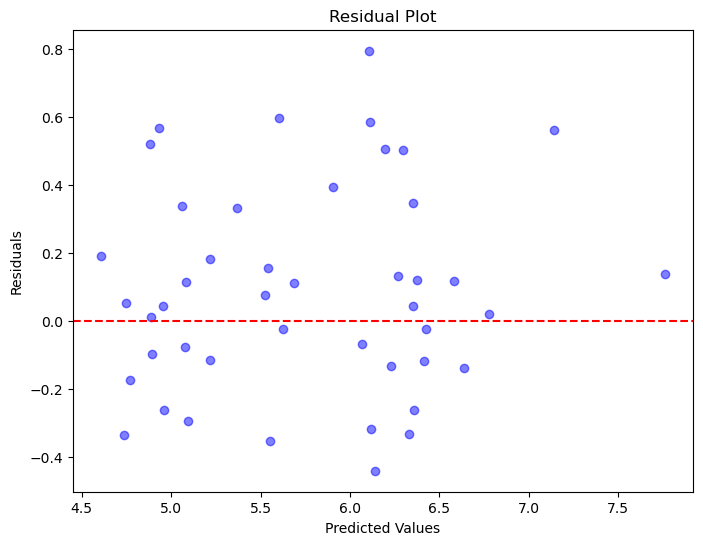

In [114]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame for simplicity
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

# We will try to predict 'sepal length (cm)' using other features
X = iris_df.drop('sepal length (cm)', axis=1)
y = iris_df['sepal length (cm)']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R² (Coefficient of Determination): {r2:.2f}")

# Calculate residuals
residuals = y_test - y_pred

# Plotting the residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame for simplicity
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

# We will try to predict 'sepal length (cm)' using other features
X = iris_df.drop('sepal length (cm)', axis=1)
y = iris_df['sepal length (cm)']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Squared Error (MSE): 0.10


In [118]:
# sensitivity and specificity measure for Setosa vs non-Setosa
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Load dataset (example: Iris dataset for binary classification)
from sklearn.datasets import load_iris
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only two features for simplicity
y = iris.target

# Convert the problem into a binary classification (Setosa vs Non-Setosa)
y_binary = np.where(y == 0, 0, 1)  # Setosa is 0, others are 1

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Sensitivity (Recall)
sensitivity = tp / (tp + fn)
print(f"Sensitivity (Recall): {sensitivity:.2f}")

# Specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")


Sensitivity (Recall): 1.00
Specificity: 1.00


Achieved perfect Sensitivity (Recall) and Specificity of 1.00 each, which means the logistic regression model is perfectly classifying both the positive and negative classes in your dataset:

Sensitivity (Recall) of 1.00: The model is identifying all actual positive instances (no false negatives).
Specificity of 1.00: The model is correctly identifying all negative instances (no false positives).
This suggests that:
The model fits the data very well, possibly due to a well-separated dataset (e.g., clear boundaries between classes).
It may indicate overfitting, especially if the test set is small or the dataset is simple, and the model is performing too perfectly on the given test set.

In [124]:
# sensitivity and specificity measures for all three species

from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the logistic regression model
model = LogisticRegression(C=1e5, max_iter=200)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Initialize lists to store sensitivity and specificity for each class
sensitivities = []
specificities = []

# Loop through each class to calculate sensitivity and specificity in a one-vs-rest manner
for i in np.unique(y_test):
    # For each class, treat it as the positive class and all others as negative
    y_test_binary = (y_test == i).astype(int)
    y_pred_binary = (y_pred == i).astype(int)
    
    # Compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test_binary, y_pred_binary).ravel()
    
    # Sensitivity (Recall) for class i
    sensitivity = tp / (tp + fn)
    sensitivities.append(sensitivity)
    
    # Specificity for class i
    specificity = tn / (tn + fp)
    specificities.append(specificity)
    
    # Print the results for the class
    print(f"Class {i} - Sensitivity (Recall): {sensitivity:.2f}, Specificity: {specificity:.2f}")

# Print overall sensitivity and specificity for all classes
print(f"Overall Sensitivities: {sensitivities}")
print(f"Overall Specificities: {specificities}")

# Class 0: Iris setosa
# Class 1: Iris versicolor
# Class 2: Iris virginica


Class 0 - Sensitivity (Recall): 1.00, Specificity: 1.00
Class 1 - Sensitivity (Recall): 0.54, Specificity: 0.94
Class 2 - Sensitivity (Recall): 0.85, Specificity: 0.81
Overall Sensitivities: [1.0, 0.5384615384615384, 0.8461538461538461]
Overall Specificities: [1.0, 0.9375, 0.8125]


## Extension Question (4)

This is weird! Why don't these models simply match the data perfectly? What are they doing instead? Crack open the linear and logistic regression models by looking at their documentation and the optional reading in Murphy. 

In the following two code blocks write code that implements the both of these models from scratch. In your comments, explain what the models are doing to "fit" the data. 

Transformers can be helpful here, but be careful, they'll often give answers that are generic rather than specific to this code. You'll have to bully them into paying attention to it! You can include your dialog with them as part of your answer. 

In [135]:
import numpy as np

# Linear regression model from scratch
class LinearRegressionScratch:
    def __init__(self):
        self.weights = None
        self.bias = None
    
    # Fit the model
    def fit(self, X, y, lr=0.01, epochs=1000):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent
        for _ in range(epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            # Update parameters
            self.weights -= lr * dw
            self.bias -= lr * db
    
    # Predict output
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Explanation:
# The model is "fitting" the data by iteratively adjusting the weights (coefficients) and bias 
# to minimize the error (difference between actual and predicted values). 
# The key objective is minimizing the sum of squared differences between the actual target values and the predictions.


In [140]:
# Testing the custom Linear Regression model
if __name__ == "__main__":
    # Sample data: X = features, y = target values
    X_test = np.array([[1], [2], [3], [4], [5]])
    y_test = np.array([1.5, 3.0, 4.5, 6.0, 7.5])
    
    # Initialize and train the model
    linear_model = LinearRegressionScratch()
    linear_model.fit(X_test, y_test)
    
    # Predict values
    predictions = linear_model.predict(X_test)
    
    # Print actual and predicted values
    print("Linear Regression Predictions:")
    for actual, predicted in zip(y_test, predictions):
        print(f"Actual: {actual}, Predicted: {predicted}")


Linear Regression Predictions:
Actual: 1.5, Predicted: 1.5513810705462852
Actual: 3.0, Predicted: 3.031697229589438
Actual: 4.5, Predicted: 4.512013388632591
Actual: 6.0, Predicted: 5.992329547675744
Actual: 7.5, Predicted: 7.472645706718897


<Figure size 600x400 with 0 Axes>

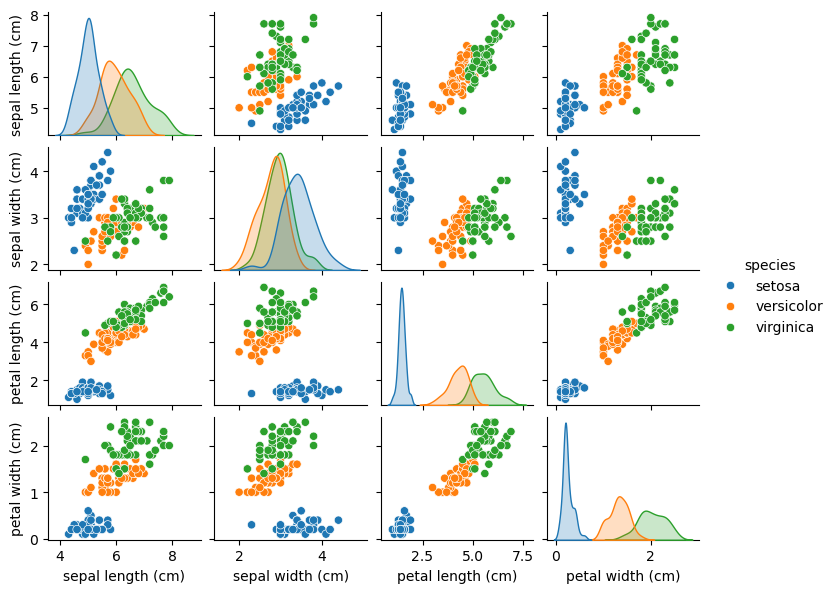

Mean Absolute Error (Custom Linear Regression): 0.30
Mean Squared Error (Custom Linear Regression): 0.13
Root Mean Squared Error (Custom Linear Regression): 0.36
R² (Custom Linear Regression): 0.81


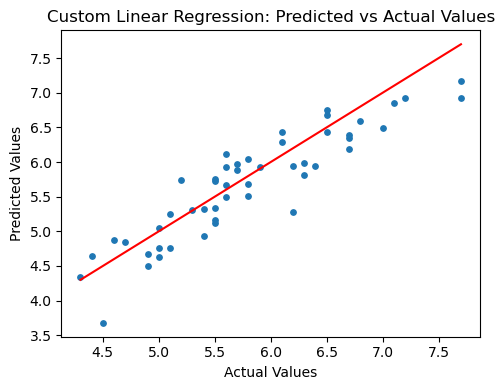

In [154]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Custom Linear Regression class from scratch
class LinearRegressionScratch:
    def __init__(self):
        self.weights = None
        self.bias = None
    
    def fit(self, X, y, lr=0.01, epochs=1000):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            self.weights -= lr * dw
            self.bias -= lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Load Iris data
iris = load_iris()

# Creating DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

# Converting species to categorical labels
def converter(specie):
    if specie == 0:
        return 'setosa'
    elif specie == 1:
        return 'versicolor'
    else:
        return 'virginica'
target_df['species'] = target_df['species'].apply(converter)

# Concatenate and visualize dataset
iris_df = pd.concat([iris_df, target_df], axis=1)
plt.figure(figsize=(6, 4))  # Adjusting size
sns.pairplot(iris_df, hue='species', height=1.5, aspect=1.2)
plt.show()

# Linear Regression: Drop 'species' column and prepare X and y for regression
iris_df.drop('species', axis=1, inplace=True)
X_reg = iris_df.drop(labels='sepal length (cm)', axis=1)
y_reg = iris_df['sepal length (cm)']

# Splitting the Dataset for Linear Regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.33, random_state=101)

# Initialize and train the custom Linear Regression model
linear_model = LinearRegressionScratch()
linear_model.fit(X_train_reg, y_train_reg)

# Making predictions
pred_reg = linear_model.predict(X_test_reg)

# Evaluating Linear Regression model
mae = mean_absolute_error(y_test_reg, pred_reg)
mse = mean_squared_error(y_test_reg, pred_reg)
rmse = np.sqrt(mse)
r2 = 1 - (np.sum((pred_reg - y_test_reg) ** 2) / np.sum((y_test_reg - np.mean(y_test_reg)) ** 2))

print(f'Mean Absolute Error (Custom Linear Regression): {mae:.2f}')
print(f'Mean Squared Error (Custom Linear Regression): {mse:.2f}')
print(f'Root Mean Squared Error (Custom Linear Regression): {rmse:.2f}')
print(f'R² (Custom Linear Regression): {r2:.2f}')

# Visualize Predictions vs Actual Values
plt.figure(figsize=(5, 4))  # Adjusting size
plt.scatter(y_test_reg, pred_reg, s=15)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red')  # Diagonal line
plt.title('Custom Linear Regression: Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()


The slightly worse accuracy in the custom Linear Regression model could be due to a few reasons:

1. Learning Rate and Convergence:
The custom model uses a fixed learning rate (lr=0.01). If the rate is too high, the model might not converge to an optimal solution, and if it's too low, it might not update effectively within the set epochs.
You could experiment with different learning rates or implement adaptive learning rates for better convergence.
2. Gradient Descent Iterations (Epochs):
The model might not have enough epochs to properly minimize the loss. You could increase the number of iterations or implement a stopping criterion based on convergence (e.g., if the error stops decreasing).
3. Bias Initialization:
The custom model initializes bias at 0. In practice, initializing the bias with more informed or non-zero values can lead to better and faster convergence.
4. Numerical Stability:
Gradient descent could suffer from numerical instability, especially if features are not scaled properly. Ensure that the input features are normalized or standardized before training.
Suggested Improvements:
Tune the learning rate or epochs for better optimization.
Normalize or scale the features.
Check for early stopping or convergence behavior during training.
Adjusting these might help the custom model perform closer to the accuracy of the scikit-learn model.

In [194]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def tune_parameters(X_train, X_test, y_train, y_test, learning_rate_start, epoch_start):
    best_r2 = -float('inf')
    best_params = {}
    best_mae, best_mse, best_rmse = None, None, None

    lr = learning_rate_start
    while lr <= 0.03:  # Increment LR by 0.1 until it reaches 1.0
        epochs = epoch_start
        while epochs <= 2000:  # Increment epochs by 1000, starting from 2000
            model = LinearRegressionScratch()
            model.fit(X_train, y_train, lr=lr, epochs=epochs)
            predictions = model.predict(X_test)

            # Calculate errors
            mae = mean_absolute_error(y_test, predictions)
            mse = mean_squared_error(y_test, predictions)
            rmse = np.sqrt(mse)

            # Calculate R² score
            ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
            ss_residual = np.sum((y_test - predictions) ** 2)
            r2 = 1 - (ss_residual / ss_total)

            print(f"Learning Rate: {lr}, Epochs: {epochs}, R²: {r2:.4f}")
            print(f"Mean Absolute Error: {mae:.2f}")
            print(f"Mean Squared Error: {mse:.2f}")
            print(f"Root Mean Squared Error: {rmse:.2f}\n")

            # Track the best parameters
            if r2 > best_r2:
                best_r2 = r2
                best_params = {'lr': lr, 'epochs': epochs}
                best_mae, best_mse, best_rmse = mae, mse, rmse

            epochs += 200
        lr += 0.001

    print("\nBest Parameters:")
    print(f"Learning Rate: {best_params['lr']}, Epochs: {best_params['epochs']}, Best R²: {best_r2:.4f}")
    print(f"Mean Absolute Error: {best_mae:.2f}")
    print(f"Mean Squared Error: {best_mse:.2f}")
    print(f"Root Mean Squared Error: {best_rmse:.2f}\n")

# Load Iris dataset
iris = load_iris()
X = iris.data[:, 1:]  # Features: sepal width, petal length, petal width
y = iris.data[:, 0]   # Target: sepal length

# Standardize features to prevent large values
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Tune parameters with increments for learning rate and epochs
tune_parameters(X_train, X_test, y_train, y_test, learning_rate_start=0.01, epoch_start=1000)


Learning Rate: 0.01, Epochs: 1000, R²: 0.8607
Mean Absolute Error: 0.24
Mean Squared Error: 0.09
Root Mean Squared Error: 0.30

Learning Rate: 0.01, Epochs: 1200, R²: 0.8628
Mean Absolute Error: 0.24
Mean Squared Error: 0.09
Root Mean Squared Error: 0.30

Learning Rate: 0.01, Epochs: 1400, R²: 0.8642
Mean Absolute Error: 0.23
Mean Squared Error: 0.09
Root Mean Squared Error: 0.30

Learning Rate: 0.01, Epochs: 1600, R²: 0.8652
Mean Absolute Error: 0.23
Mean Squared Error: 0.09
Root Mean Squared Error: 0.30

Learning Rate: 0.01, Epochs: 1800, R²: 0.8659
Mean Absolute Error: 0.23
Mean Squared Error: 0.09
Root Mean Squared Error: 0.30

Learning Rate: 0.01, Epochs: 2000, R²: 0.8663
Mean Absolute Error: 0.23
Mean Squared Error: 0.09
Root Mean Squared Error: 0.30

Learning Rate: 0.011, Epochs: 1000, R²: 0.8618
Mean Absolute Error: 0.24
Mean Squared Error: 0.09
Root Mean Squared Error: 0.30

Learning Rate: 0.011, Epochs: 1200, R²: 0.8637
Mean Absolute Error: 0.24
Mean Squared Error: 0.09
Root 

Following is the best parameter obtained from the code above:

Best Parameters:
Learning Rate: 0.019000000000000006, Epochs: 1200, 

Following is the result:
Mean Absolute Error: 0.23
Mean Squared Error: 0.09
Root Mean Squared Error: 0.30
Best R²: 0.8664

which imrpoved from the model with default parameters:
Mean Absolute Error (Custom Linear Regression): 0.30
Mean Squared Error (Custom Linear Regression): 0.13
Root Mean Squared Error (Custom Linear Regression): 0.36
R² (Custom Linear Regression): 0.81

and from the scikit learn model in every measure, although by a small margin:
Mean Absolute Error (Linear Regression): 0.26
Mean Squared Error (Linear Regression): 0.11
Root Mean Squared Error (Linear Regression): 0.33
R² (Linear Regression): 0.84

In [138]:
class LogisticRegressionScratch:
    def __init__(self):
        self.weights = None
        self.bias = None
    
    # Sigmoid function
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    # Fit the model
    def fit(self, X, y, lr=0.01, epochs=1000):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent
        for _ in range(epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)
            
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            # Update weights
            self.weights -= lr * dw
            self.bias -= lr * db
    
    # Predict probabilities
    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)
    
    # Predict class labels (0 or 1)
    def predict(self, X):
        y_pred_proba = self.predict_proba(X)
        return [1 if i > 0.5 else 0 for i in y_pred_proba]

# Explanation:
# Logistic regression fits the data by adjusting the weights and bias to minimize the 
# negative log-likelihood. The sigmoid function ensures that predictions are probabilities 
# (values between 0 and 1), making logistic regression ideal for classification problems.


In [142]:
# Testing the Logistic Regression model
if __name__ == "__main__":
    # Sample binary classification data: X = features, y = class labels (0 or 1)
    X_test = np.array([[0.5], [1.0], [1.5], [2.0], [2.5], [3.0]])
    y_test = np.array([0, 0, 0, 1, 1, 1])
    
    # Initialize and train the model
    logistic_model = LogisticRegressionScratch()
    logistic_model.fit(X_test, y_test)
    
    # Predict class labels
    predictions = logistic_model.predict(X_test)
    
    # Print actual and predicted values
    print("Logistic Regression Predictions:")
    for actual, predicted in zip(y_test, predictions):
        print(f"Actual: {actual}, Predicted: {predicted}")


Logistic Regression Predictions:
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1


<Figure size 600x400 with 0 Axes>

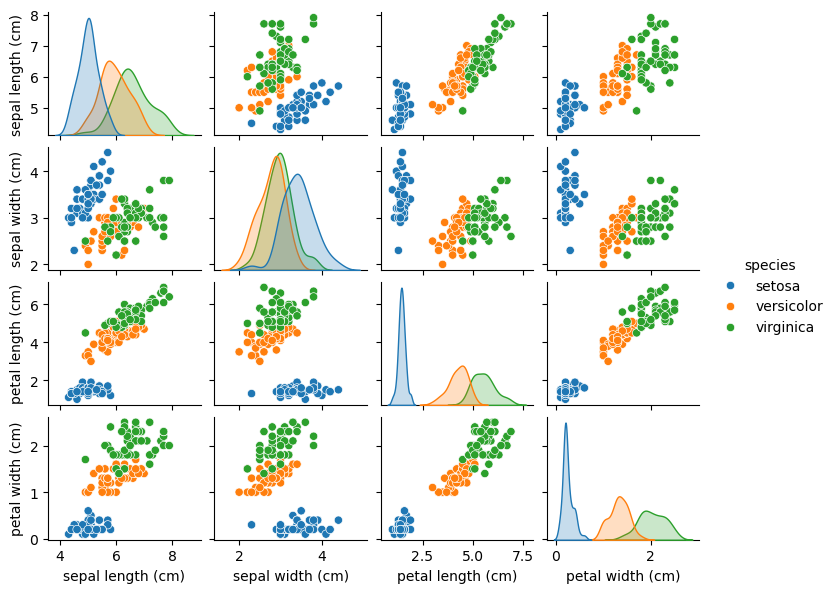

Accuracy (Logistic Regression): 0.94
Confusion Matrix:
[[12  3]
 [ 0 35]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.92      1.00      0.96        35

    accuracy                           0.94        50
   macro avg       0.96      0.90      0.92        50
weighted avg       0.94      0.94      0.94        50



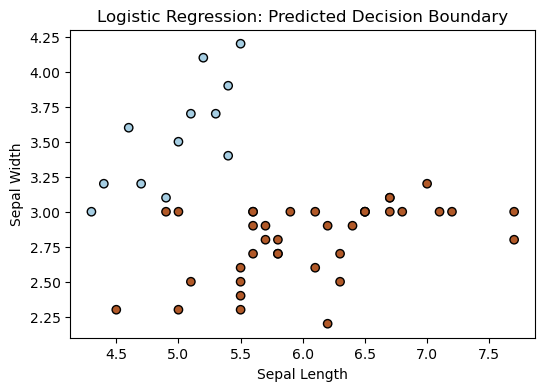

In [202]:
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Custom Logistic Regression from scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0

        for _ in range(self.iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / self.m) * np.dot(X.T, (y_predicted - y))
            db = (1 / self.m) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_pred_labels = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_pred_labels

# Load Iris Data
iris = load_iris()

# Creating DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

# Converting species to categorical labels
def converter(specie):
    if specie == 0:
        return 'setosa'
    elif specie == 1:
        return 'versicolor'
    else:
        return 'virginica'
target_df['species'] = target_df['species'].apply(converter)

# Concatenate and visualize dataset
iris_df = pd.concat([iris_df, target_df], axis=1)
plt.figure(figsize=(6, 4))  # Adjusting size
sns.pairplot(iris_df, hue='species', height=1.5, aspect=1.2)
plt.show()

# Logistic Regression: Use the first two features (sepal length and width)
X_log = iris.data[:, :2]  # Only use the first two features (sepal length and width)
y_log = (iris.target != 0).astype(int)  # Binary classification: Setosa (0) vs Non-setosa (1)

# Splitting the Dataset for Logistic Regression
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.33, random_state=101)

# Fit the custom logistic regression model
logistic_model = LogisticRegressionScratch(learning_rate=0.01, iterations=1000)
logistic_model.fit(X_train_log, y_train_log)

# Make predictions and evaluate the model
y_pred_log = logistic_model.predict(X_test_log)

# Evaluating the Logistic Regression model
accuracy = accuracy_score(y_test_log, y_pred_log)
print(f'Accuracy (Logistic Regression): {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test_log, y_pred_log))
print('Classification Report:')
print(classification_report(y_test_log, y_pred_log))

# Visualizing Logistic Regression Decision Boundary
plt.figure(figsize=(6, 4))
plt.scatter(X_test_log[:, 0], X_test_log[:, 1], c=y_pred_log, cmap=plt.cm.Paired, edgecolors="k")
plt.title("Logistic Regression: Predicted Decision Boundary")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()


<Figure size 600x400 with 0 Axes>

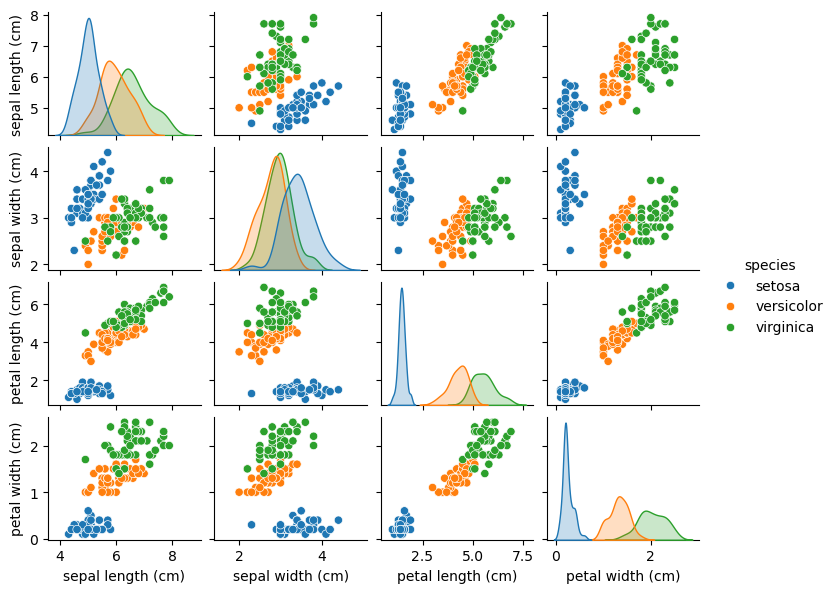

Accuracy (Logistic Regression): 0.45
Confusion Matrix:
[[ 0 18]
 [ 0 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.45      1.00      0.62        15

    accuracy                           0.45        33
   macro avg       0.23      0.50      0.31        33
weighted avg       0.21      0.45      0.28        33



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


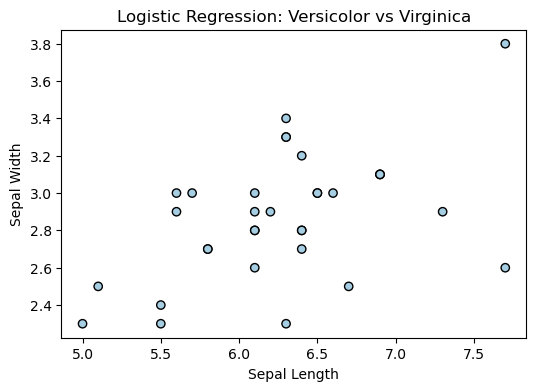

In [204]:
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Custom Logistic Regression from scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0

        for _ in range(self.iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / self.m) * np.dot(X.T, (y_predicted - y))
            db = (1 / self.m) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_pred_labels = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_pred_labels

# Load Iris Data
iris = load_iris()

# Creating DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

# Converting species to categorical labels
def converter(specie):
    if specie == 0:
        return 'setosa'
    elif specie == 1:
        return 'versicolor'
    else:
        return 'virginica'
target_df['species'] = target_df['species'].apply(converter)

# Concatenate and visualize dataset
iris_df = pd.concat([iris_df, target_df], axis=1)
plt.figure(figsize=(6, 4))  # Adjusting size
sns.pairplot(iris_df, hue='species', height=1.5, aspect=1.2)
plt.show()

# Logistic Regression: Classifying Versicolor (1) vs Virginica (2)
X_log = iris.data[iris.target != 0, :2]  # Use only Versicolor and Virginica, and first two features
y_log = (iris.target[iris.target != 0] == 2).astype(int)  # Versicolor (0) vs Virginica (1)

# Splitting the Dataset for Logistic Regression
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.33, random_state=101)

# Fit the custom logistic regression model
logistic_model = LogisticRegressionScratch(learning_rate=0.01, iterations=1000)
logistic_model.fit(X_train_log, y_train_log)

# Make predictions and evaluate the model
y_pred_log = logistic_model.predict(X_test_log)

# Evaluating the Logistic Regression model
accuracy = accuracy_score(y_test_log, y_pred_log)
print(f'Accuracy (Logistic Regression): {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test_log, y_pred_log))
print('Classification Report:')
print(classification_report(y_test_log, y_pred_log))

# Visualizing Logistic Regression Decision Boundary
plt.figure(figsize=(6, 4))
plt.scatter(X_test_log[:, 0], X_test_log[:, 1], c=y_pred_log, cmap=plt.cm.Paired, edgecolors="k")
plt.title("Logistic Regression: Versicolor vs Virginica")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()
